# Domácí úkol


# Sparse matice (sousednosti)
Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). 

Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
- hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
- mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

**Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:**
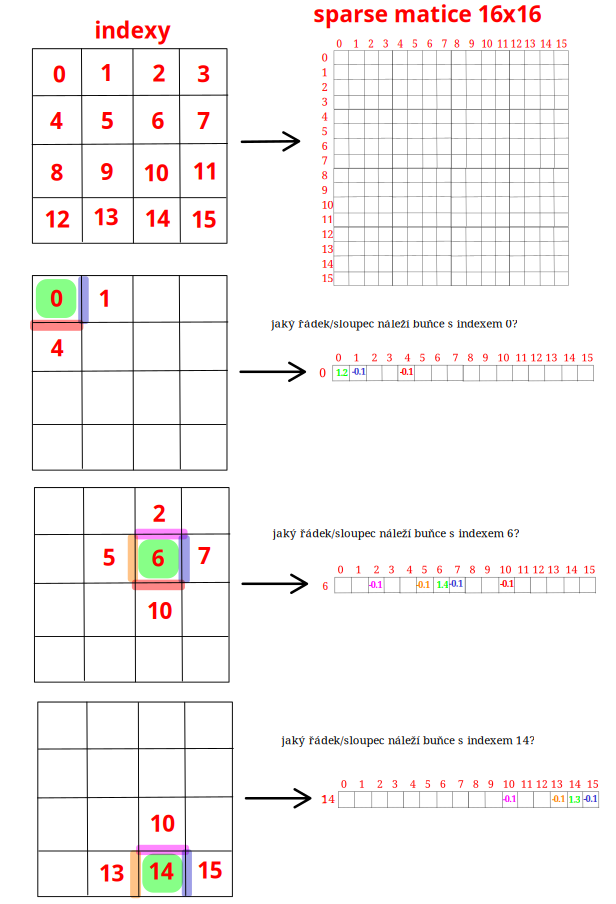

Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```

## Úkol 1.
**Sestavte matici pomocí formátu `LIL` a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě.** 
 - vypište a vykreslete jako obrázek pro $n=3$ a $\varepsilon = 0.1$.
 - vykreslete jako obrázek pro $n=100$ a $\varepsilon = 0.2$. 

In [ ]:
import scipy.sparse as sparse
import numpy as np

def A_assembly(n=3, epsilon=1e-1):
    A = sparse.lil_matrix((n*n, n*n))
    for i in range(n):
        for j in range(n):
            # TODO fill matrix A - diagonal and non-diagonal elements
            pass
    
    return A

A = A_assembly(3, 1e-1)
print(A.todense())

## Úkol 2. 

Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
- Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
- Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

In [ ]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_assembly(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

In [ ]:
import scipy as sp

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek


In [ ]:
# TODO - spočtěte a vykreslete vlastní vektory matice A

# Bonusový úkol

**Sestavte matici $A$ z úkolu 1. bez použití cyklů.**
- porovnejte výsledky z úkolu 1 a 2 pro různé hodnoty $n$ a $\varepsilon$.

Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. 

Hint, jak na to: 
- Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
    - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
        - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
        - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
    - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
        - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
- Tyto pole vytvořte vektorizovaně - bez cyklů

In [ ]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = # TODO - vytvořte indexy buněk nad hranou
    horizontal_low_idx = # TODO - vytvořte indexy buněk pod hranou
    row_horizontal = # TODO - vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = # TODO - vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = # TODO použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = # TODO - vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = # TODO - vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    # TODO - odečtěte epsilon pro horní hranu
    # dolní hrana
    # TODO - odečtěte epsilon pro dolní hranu
    # levá hrana
    # TODO - odečtěte epsilon pro levou hranu
    # pravá hrana
    # TODO - odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = # TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

print(A_efficiently(n, epsilon).todense())
